# Strategic Equivalence Ralations (SER) Interactive Notebook

### Overview

- Objective: Explain what strategically relevant information is, and how SER partitions the co-policy space.

- Prerequisites: Basic familiarity with multi-agent RL, best response, and policy spaces.

- Interactive Tools: Strategic ambiguity explorer, SEC visualizer, dynamic best-response plots.

### Motivation and Setup




❓ Why do we need to distinguish between relevant and irrelevant co-player info?

🤖 Driving example: Two agents in Overcooked must coordinate, but do they need to know each other's precise motor skills?

🔍 Goal: Define and visualize what "matters" for coordination.

### Preliminaries: Dec-POMDP and Best Response

📘 Recap: What is a Dec-POMDP?

📘 Define: Co-policy space Π₋ᵢ and best-response function BRᵢ

🧪 Code: Simulate BRᵢ in a toy 2-action environment.

### Strategic Ambiguity & Equivalence

This section introduces the concept of strategic ambiguity and the partitioning of co-policy space into Strategic Equivalence Classes (SECs). We'll now build an interactive visualization to explore how the best-response function BRᵢ partitions the co-policy space into Strategic Equivalence Classes (SECs).

🎯 Definition 4.1–4.3 (in plain language and code):

- What does it mean for a set of co-policies to be strategically ambiguous?

- What is a strategic equivalence class (SEC)?

📈 Interactive Figure: The visualization you already built — show how BRᵢ partitions co-policy space.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches

# Grid setup
x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)

# Best response zones
def compute_br_zone(rule):
    if rule == 'A > B':
        Z = np.where(X > Y, 0, 1)
        ambiguity = np.abs(X - Y) < 0.02
    elif rule == 'A < 0.5':
        Z = np.where(X < 0.5, 0, 1)
        ambiguity = np.abs(X - 0.5) < 0.02
    elif rule == 'A + B > 1':
        Z = np.where(X + Y > 1, 0, 1)
        ambiguity = np.abs((X + Y) - 1) < 0.02
    elif rule == '|A - B| < 0.2':
        Z = np.where(np.abs(X - Y) < 0.2, 0, 1)
        ambiguity = np.abs(np.abs(X - Y) - 0.2) < 0.02
    else:
        Z = np.where(X > Y, 0, 1)
        ambiguity = np.abs(X - Y) < 0.02
    return Z, ambiguity

# Output widget
out = widgets.Output()

# Toggle buttons
toggle = widgets.ToggleButtons(
    options=['A > B', 'A < 0.5', 'A + B > 1', '|A - B| < 0.2'],
    description='BR Rule:',
    style={'description_width': 'initial'},
    button_style='info'
)

# Update function
def update(change):
    with out:
        out.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(7, 6))
        cmap = plt.get_cmap('coolwarm')
        Z, ambiguity = compute_br_zone(change['new'])

        # Plot SEC regions
        mesh = ax.pcolormesh(X, Y, Z, cmap=cmap, shading='auto')
        
        # Overlay ambiguity zone
        ax.contour(X, Y, ambiguity, levels=[0.5], colors='black', linestyles='dotted', linewidths=1.5)

        # Best-response arrows (π_L vs π_R)
        ax.annotate('π_L', xy=(0.85, 0.2), fontsize=12, color='white', fontweight='bold')
        ax.annotate('π_R', xy=(0.2, 0.85), fontsize=12, color='white', fontweight='bold')

        # Labels and title
        ax.set_xlabel('Prob(Action A)')
        ax.set_ylabel('Prob(Action B)')
        ax.set_title(f'Strategic Equivalence Classes\nRule: {change["new"]}')
        ax.axline((0, 0), slope=1, color='k', linestyle='--', linewidth=1.2)

        # Color legend
        red_patch = mpatches.Patch(color=cmap(0.0), label='SEC_A → BRᵢ = π_L')
        blue_patch = mpatches.Patch(color=cmap(1.0), label='SEC_B → BRᵢ = π_R')
        amb_patch = mpatches.Patch(facecolor='none', edgecolor='black', linestyle='dotted', label='Ambiguity Zone')
        ax.legend(handles=[red_patch, blue_patch, amb_patch], loc='lower right', frameon=True)

        plt.tight_layout()
        plt.show()

# Trigger update on toggle
toggle.observe(update, names='value')

# Initial render
update({'new': toggle.value})

# Display
display(toggle, out)


ToggleButtons(button_style='info', description='BR Rule:', options=('A > B', 'A < 0.5', 'A + B > 1', '|A - B| …

Output()

### Theoretical Core: Theorem 1 (Pre-image as SEC)

💡 Explain: Why is the pre-image of BRᵢ the “maximally compressed” info?

📐 Diagram: Venn-like diagram showing how SECs emerge

📏 Bonus: Use mutual information / KL divergence analogies to show why BRᵢ is a kind of information bottleneck.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches

# Create the grid again
x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)

# Output widget for dynamic rendering
preimage_out = widgets.Output()

# Define BRᵢ region + ambiguity extractor
def compute_br_and_ambiguity():
    Z = np.where(X > Y, 0, 1)  # SEC_A if X > Y, SEC_B otherwise
    ambiguity = np.abs(X - Y) < 0.02
    return Z, ambiguity

# Toggle for Section 4 view
preimage_toggle = widgets.ToggleButtons(
    options=['Show All', 'Highlight π_L', 'Highlight π_R', 'Show Ambiguity Only'],
    description='View:',
    style={'description_width': 'initial'},
    button_style='info'
)

# Update function
def update_preimage_view(change):
    with preimage_out:
        preimage_out.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(7, 6))
        cmap = plt.get_cmap('coolwarm')

        Z, ambiguity = compute_br_and_ambiguity()

        if change['new'] == 'Show All':
            mask = np.full(Z.shape, True)
        elif change['new'] == 'Highlight π_L':
            mask = Z == 0
        elif change['new'] == 'Highlight π_R':
            mask = Z == 1
        elif change['new'] == 'Show Ambiguity Only':
            mask = ambiguity
        else:
            mask = np.full(Z.shape, True)

        Z_masked = np.ma.masked_where(~mask, Z)
        mesh = ax.pcolormesh(X, Y, Z_masked, cmap=cmap, shading='auto')

        # Overlay ambiguity line if not already focused on it
        if change['new'] != 'Show Ambiguity Only':
            ax.contour(X, Y, ambiguity, levels=[0.5], colors='black', linestyles='dotted', linewidths=1.5)

        # Add annotations
        ax.annotate('π_L', xy=(0.85, 0.2), fontsize=12, color='white', fontweight='bold')
        ax.annotate('π_R', xy=(0.2, 0.85), fontsize=12, color='white', fontweight='bold')

        # Axes and labels
        ax.set_xlabel('Prob(Action A)')
        ax.set_ylabel('Prob(Action B)')
        ax.set_title(f'Preimage & Strategic Ambiguity\nView: {change["new"]}')
        ax.axline((0, 0), slope=1, color='k', linestyle='--', linewidth=1.2)

        # Legend
        red_patch = mpatches.Patch(color=cmap(0.0), label='SEC_A = BRᵢ⁻¹(π_L)')
        blue_patch = mpatches.Patch(color=cmap(1.0), label='SEC_B = BRᵢ⁻¹(π_R)')
        amb_patch = mpatches.Patch(facecolor='none', edgecolor='black', linestyle='dotted', label='Ambiguity Zone')
        ax.legend(handles=[red_patch, blue_patch, amb_patch], loc='lower right', frameon=True)

        plt.tight_layout()
        plt.show()

# Attach and initialize
preimage_toggle.observe(update_preimage_view, names='value')
update_preimage_view({'new': preimage_toggle.value})
display(preimage_toggle, preimage_out)


ToggleButtons(button_style='info', description='View:', options=('Show All', 'Highlight π_L', 'Highlight π_R',…

Output()

#### 🧠 Intuition: Why BRᵢ is Like an Information Bottleneck

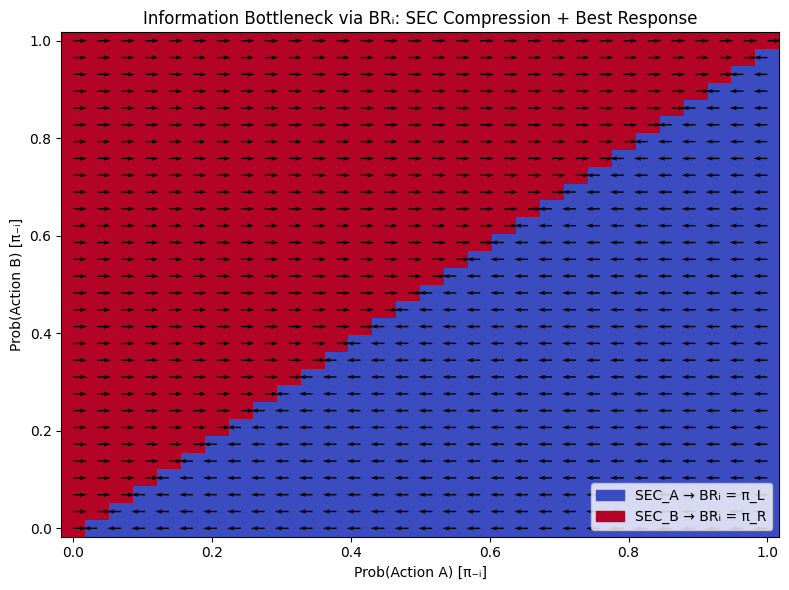

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches

# Step 1: Create the co-policy space (π₋ᵢ) grid
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)
X, Y = np.meshgrid(x, y)

# Step 2: Define BRᵢ compression rule (binary best response)
def compute_sec_and_response(x_vals, y_vals):
    # SEC_A if A > B, else SEC_B
    sec = np.where(x_vals > y_vals, 0, 1)
    # Response action: "Left" for SEC_A, "Right" for SEC_B
    dx = np.where(sec == 0, -0.02, 0.02)  # Left or right arrows
    dy = np.zeros_like(dx)
    return sec, dx, dy

# Step 3: Extract SEC class and response vector
flat_X, flat_Y = X.ravel(), Y.ravel()
sec, dx, dy = compute_sec_and_response(flat_X, flat_Y)

# Step 4: Create figure
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.get_cmap('coolwarm')

# Plot the SEC regions (compression)
Z = np.where(flat_X > flat_Y, 0, 1).reshape(X.shape)
mesh = ax.pcolormesh(X, Y, Z, cmap=cmap, shading='auto')

# Overlay best-response direction as vector field
ax.quiver(flat_X, flat_Y, dx, dy, scale=1, scale_units='xy', angles='xy', width=0.002, color='black')

# Axis and labels
ax.set_xlabel('Prob(Action A) [π₋ᵢ]')
ax.set_ylabel('Prob(Action B) [π₋ᵢ]')
ax.set_title('Information Bottleneck via BRᵢ: SEC Compression + Best Response')

# Legend patches
red_patch = mpatches.Patch(color=cmap(0.0), label='SEC_A → BRᵢ = π_L')
blue_patch = mpatches.Patch(color=cmap(1.0), label='SEC_B → BRᵢ = π_R')
arrow_patch = mpatches.FancyArrowPatch((0, 0), (0.05, 0), color='black', label='Best Response Direction')

ax.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.tight_layout()
plt.show()


### Applications

🥣 Overcooked example: Which features would fall into the same SEC?

🤝 Implicit coordination: How does this help us compress a policy space or build intention-aware agents?

### Extensions & Open Questions

Partial observability: Can agents still form equivalence classes?

Multi-agent epistemics: Who needs to know what?

Dynamic games: How do SECs evolve over time?

### Summary & Takeaways


🔁 SER gives us a minimal, sufficient view of co-player behavior.

🎨 Equivalence classes give both theoretical and practical compression.

⚙️ We can compute, visualize, and learn them efficiently.

### Extras

📚 Formal definitions from the paper

📊 Alternate visualizations (e.g., for >2 actions)

🔄 Integrate with JaxMARL or Melting Pot